# mass-spec-standards

## Mass spectra Standards fragmentation pattern

## Unique fragment for each lipid standards identified

quartz_off_screen 
                2 

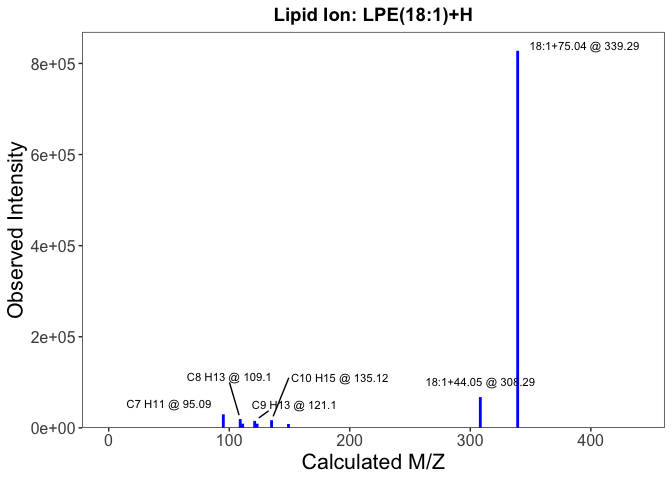

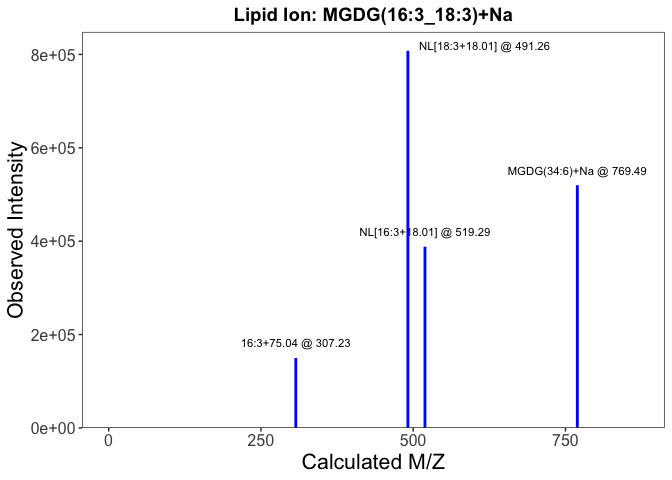

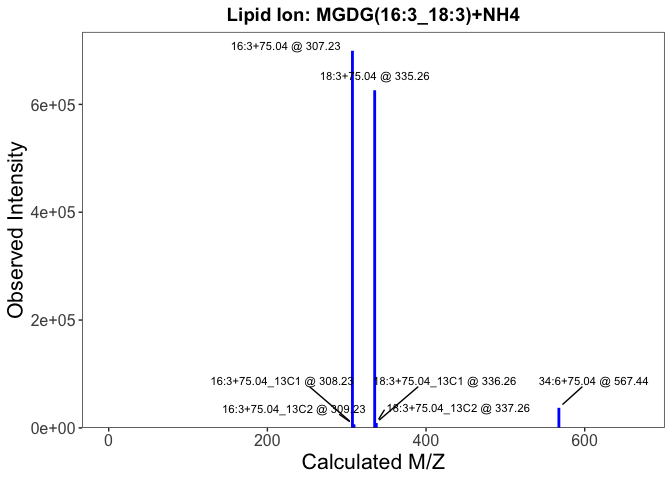

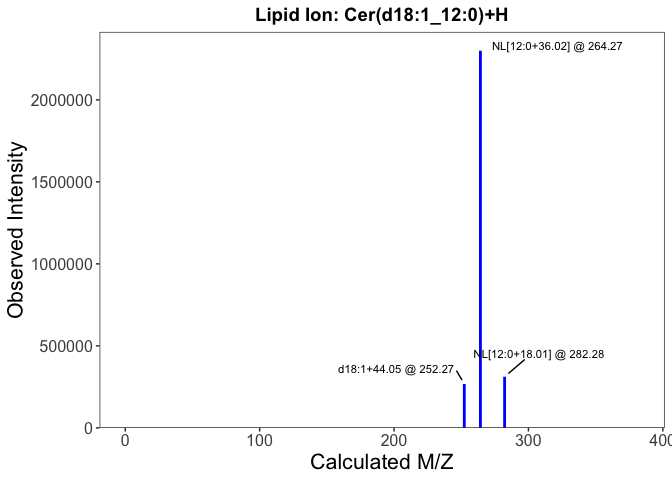

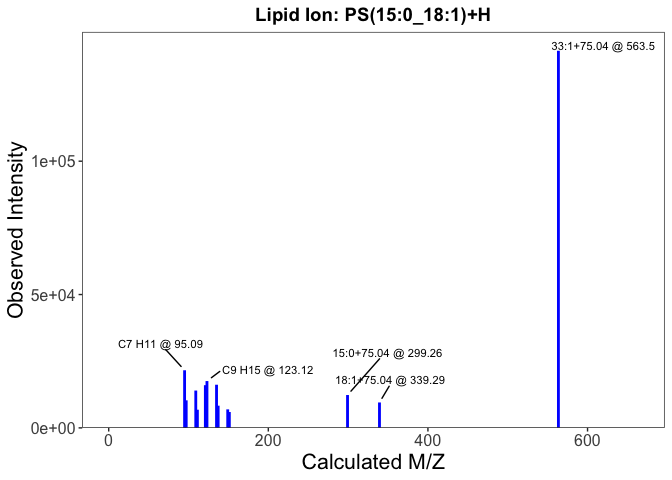

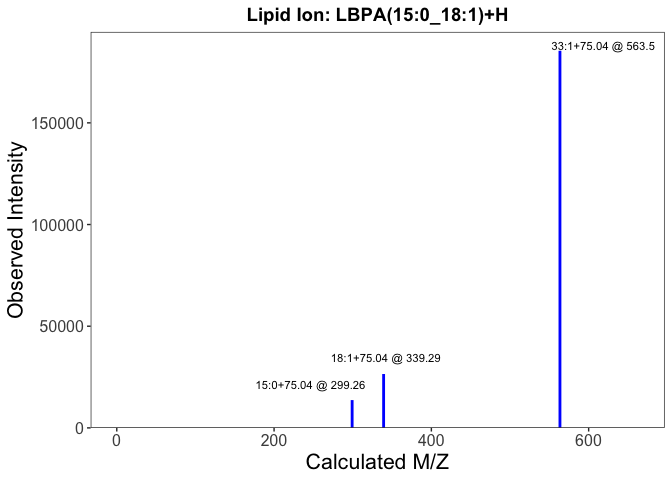

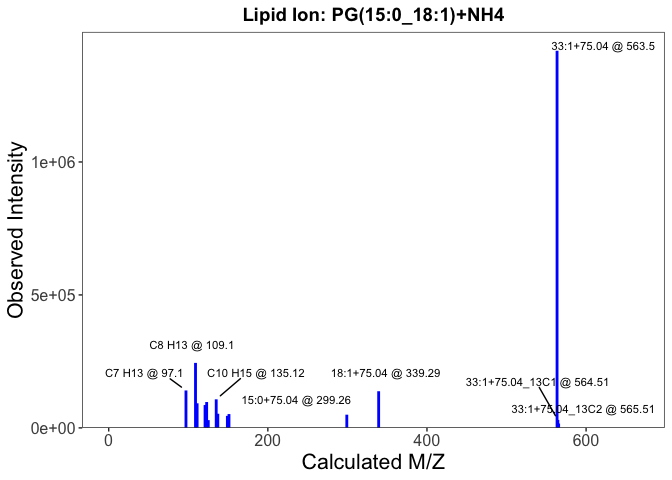

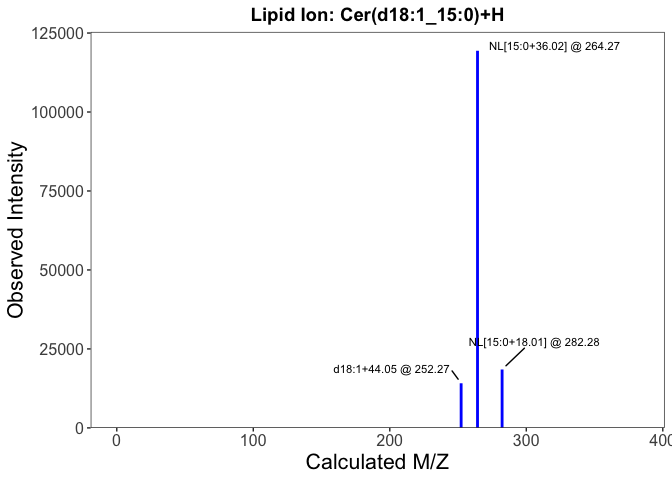

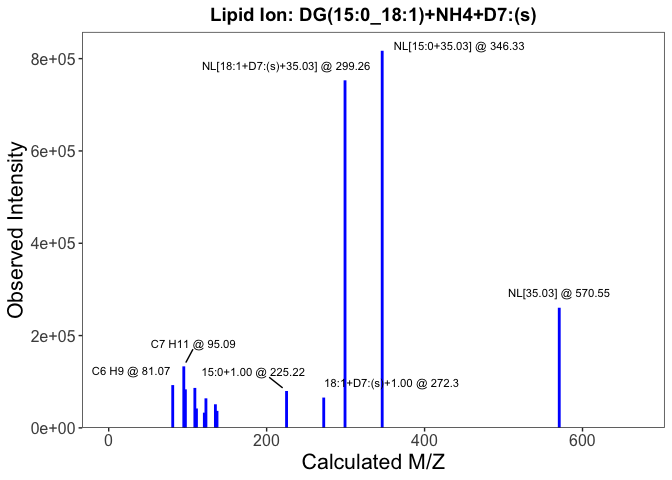

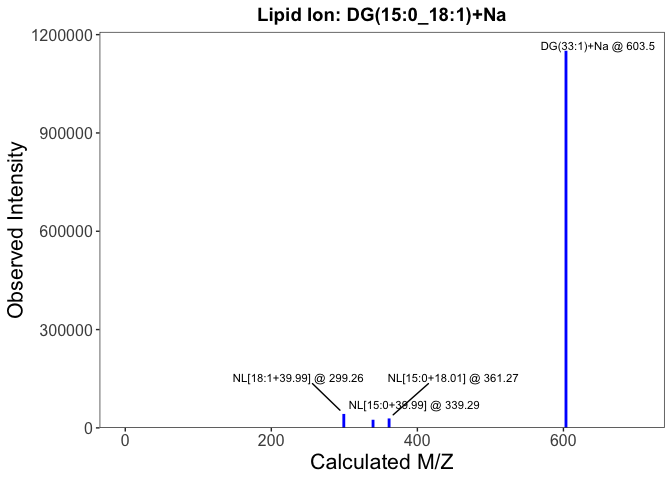

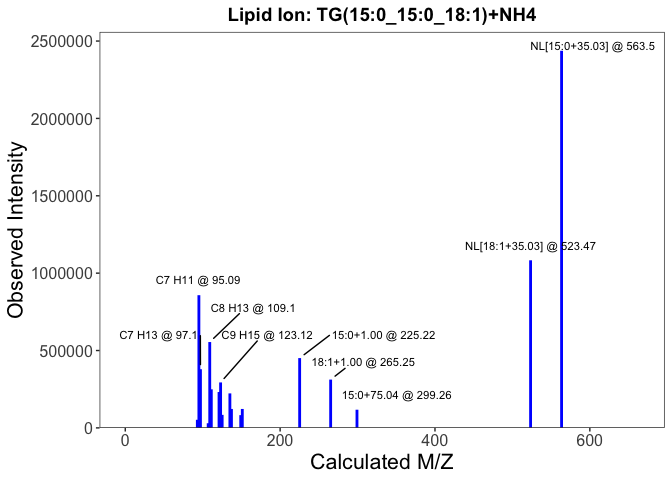

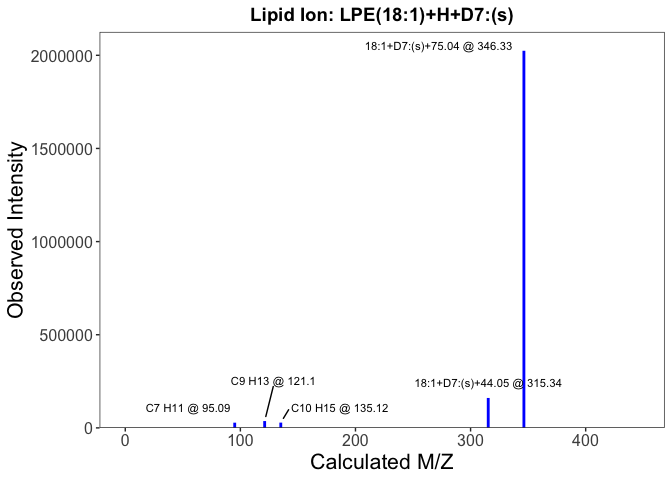

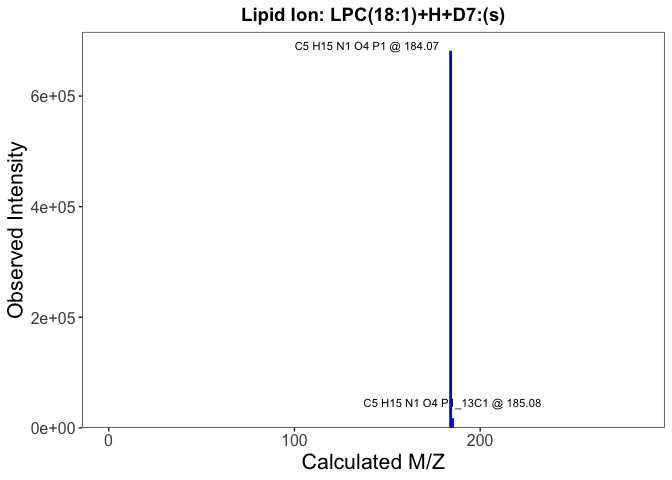

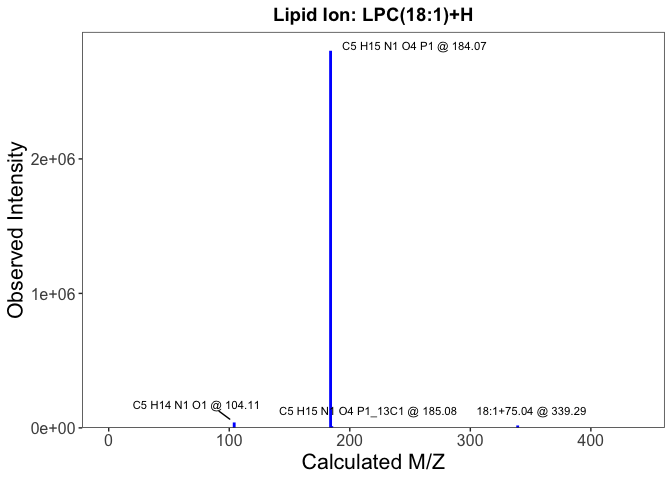

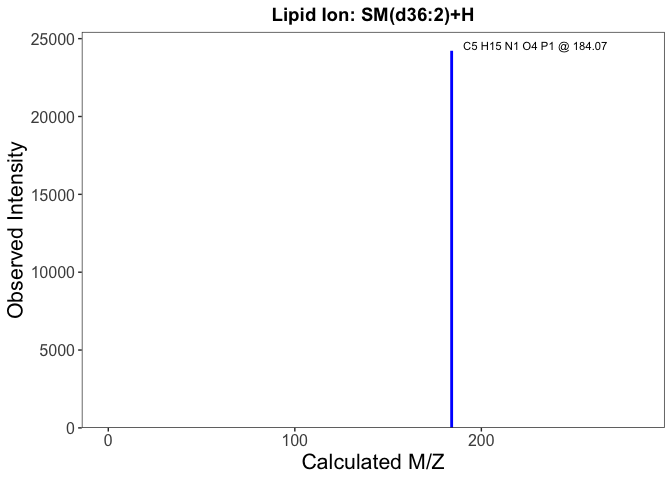

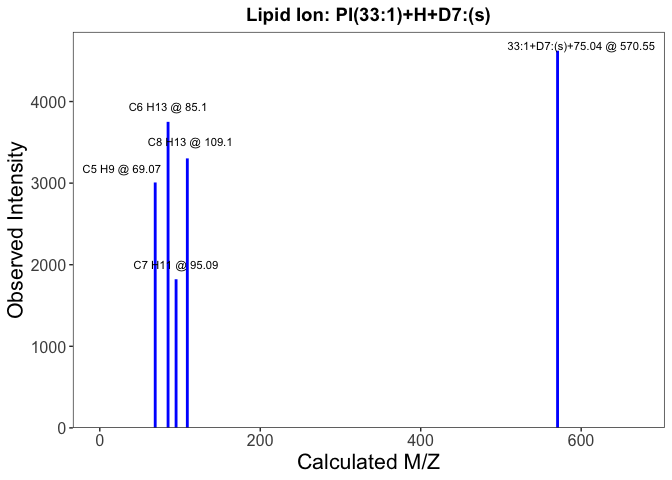

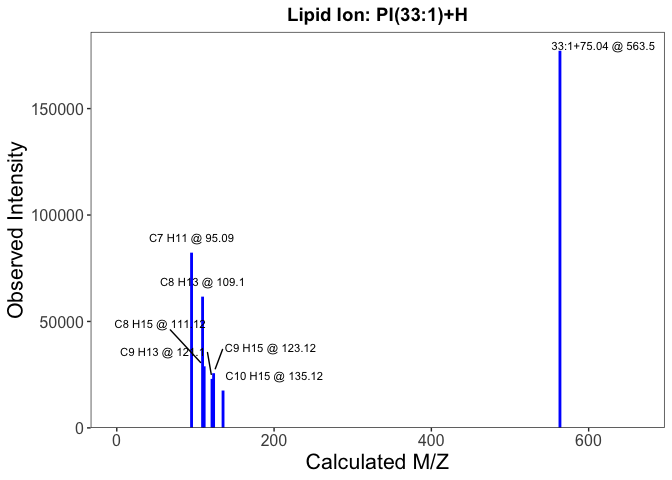

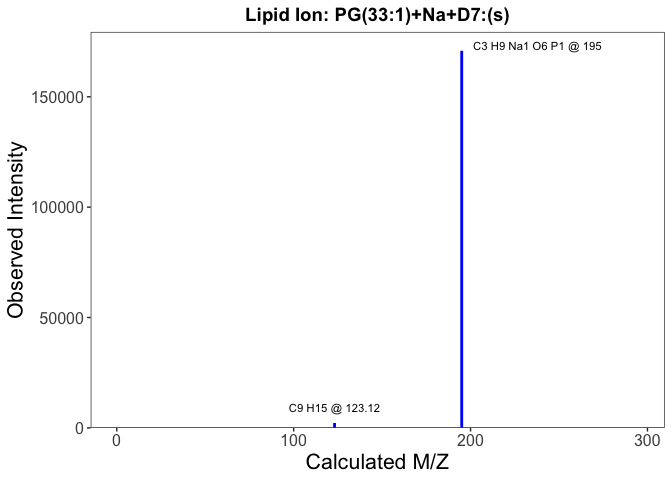

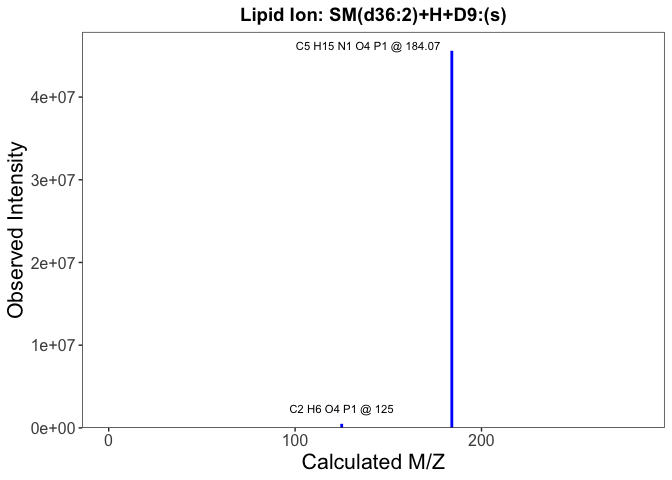

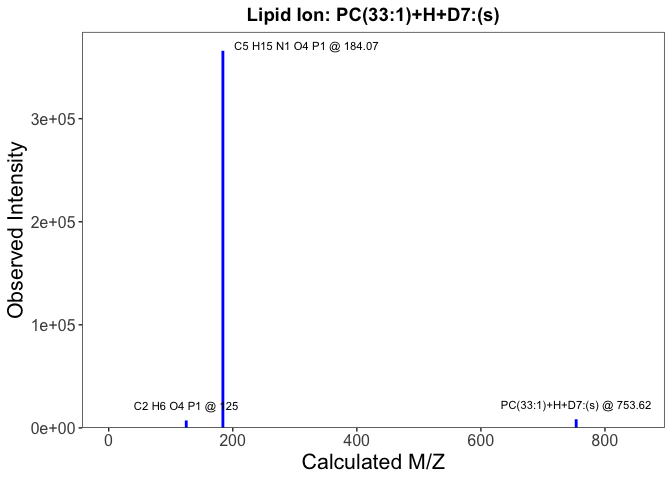

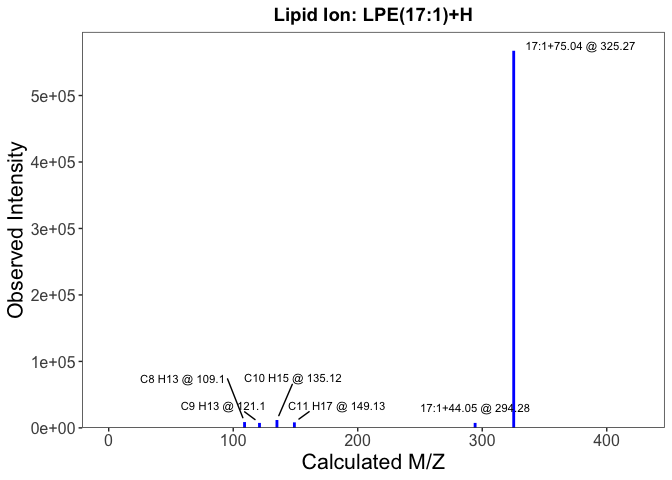

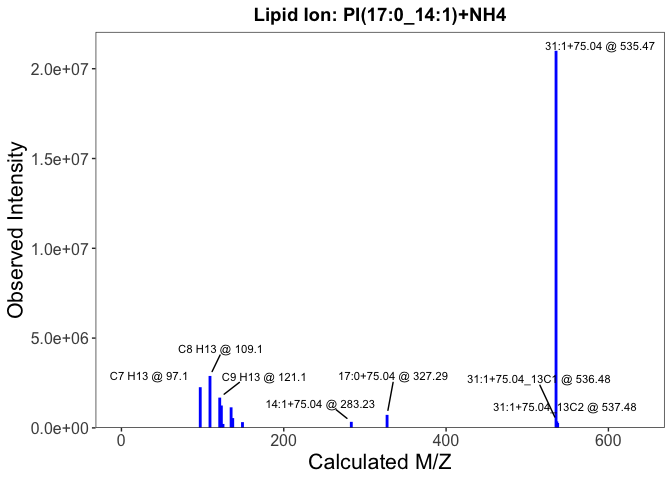

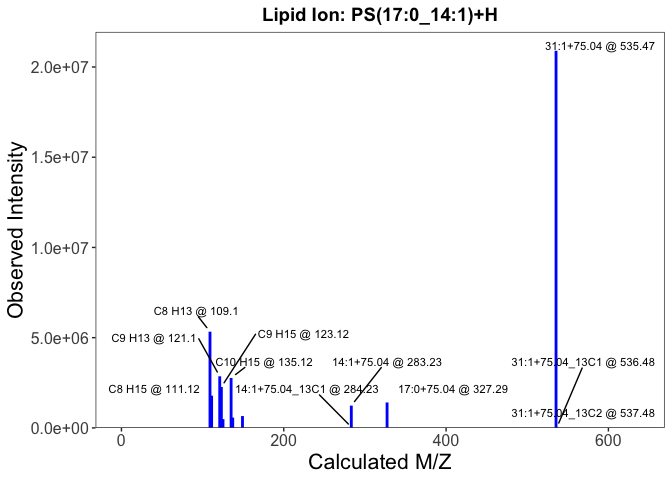

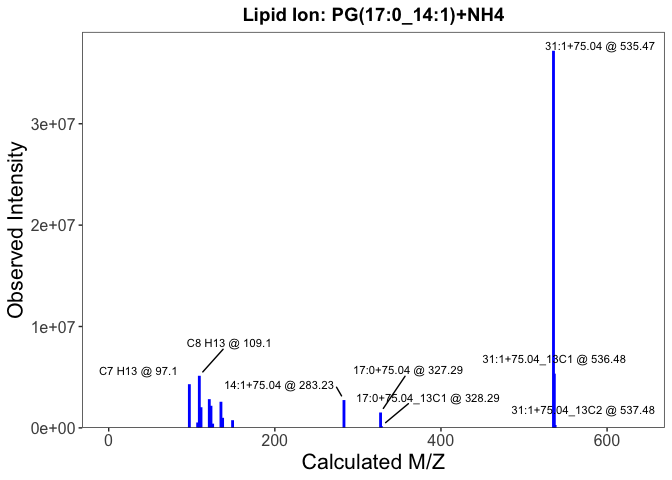

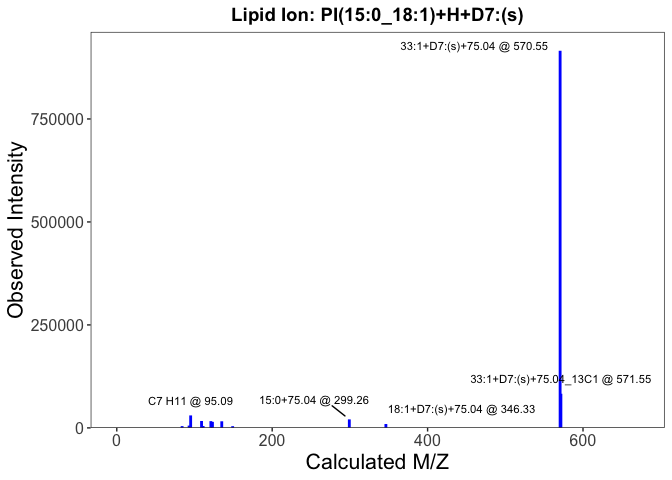

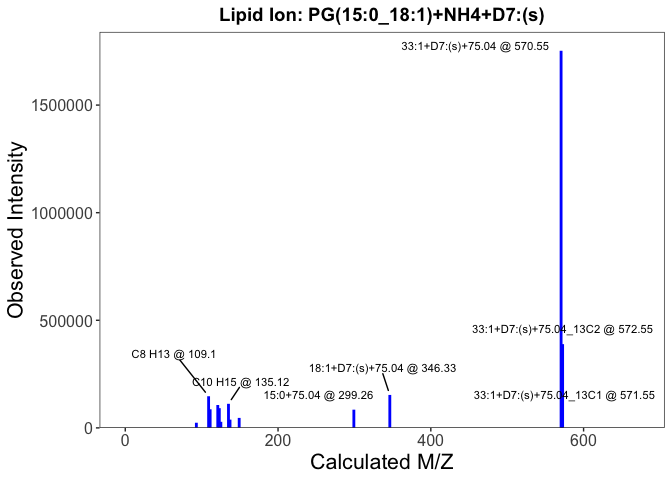

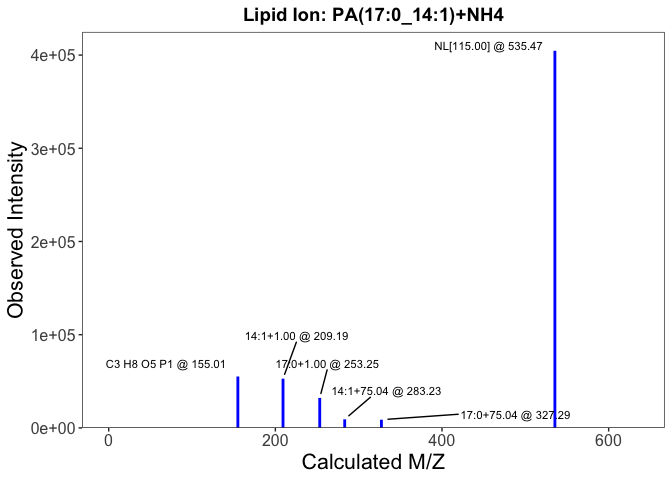

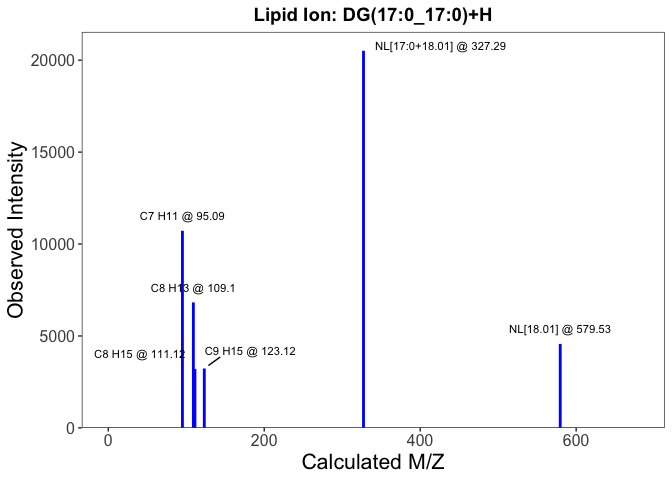

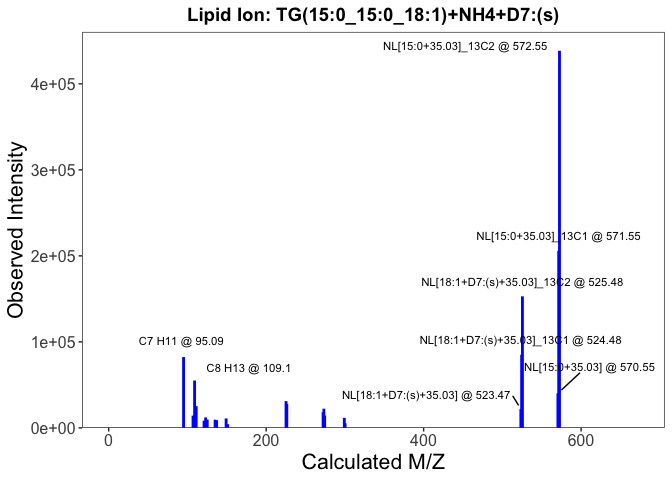

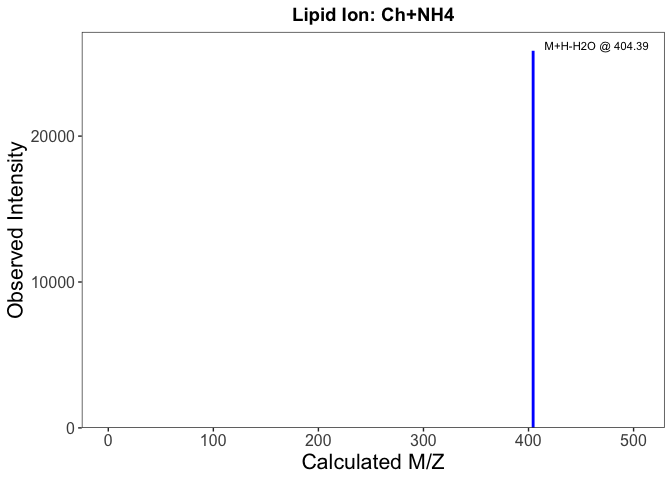

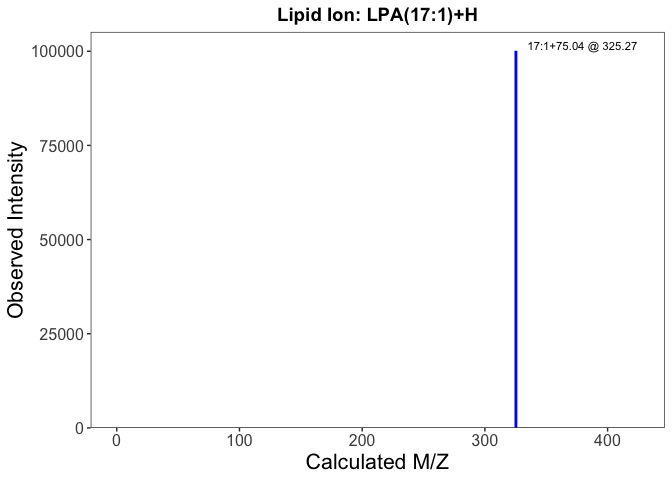

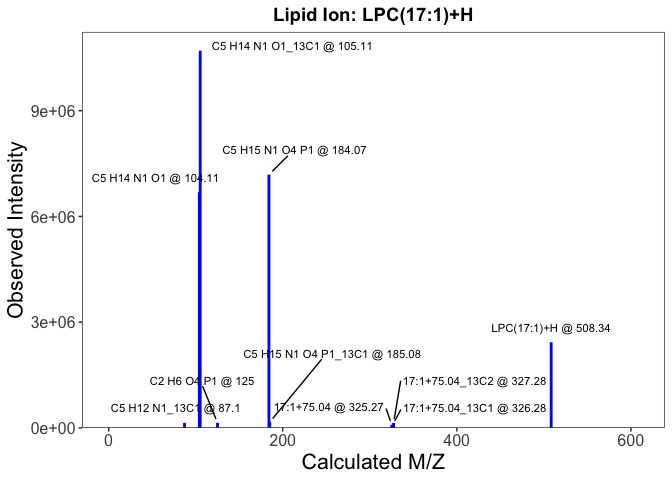

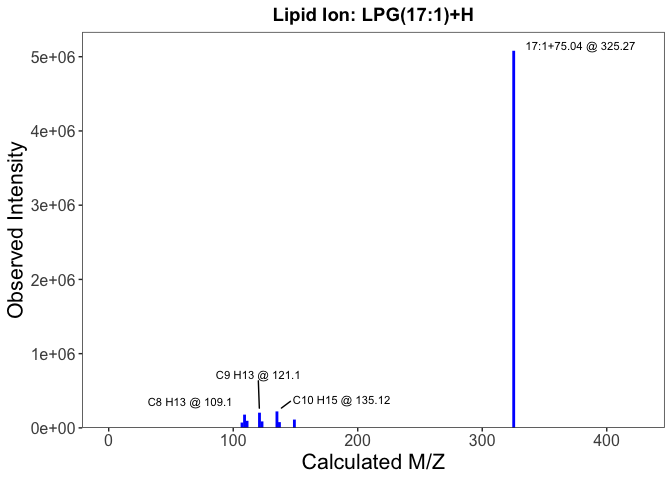

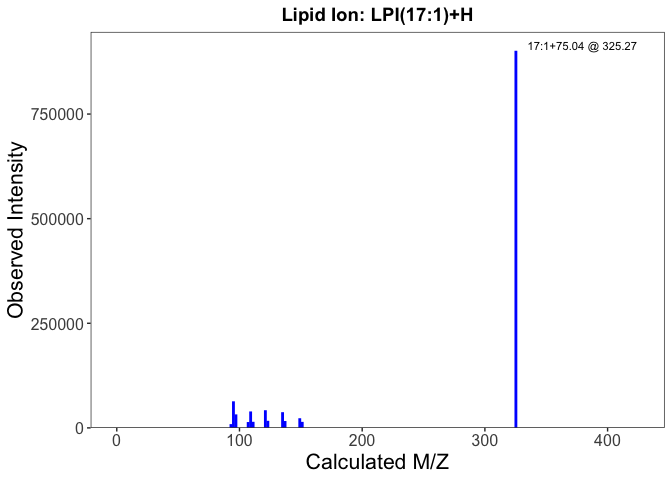

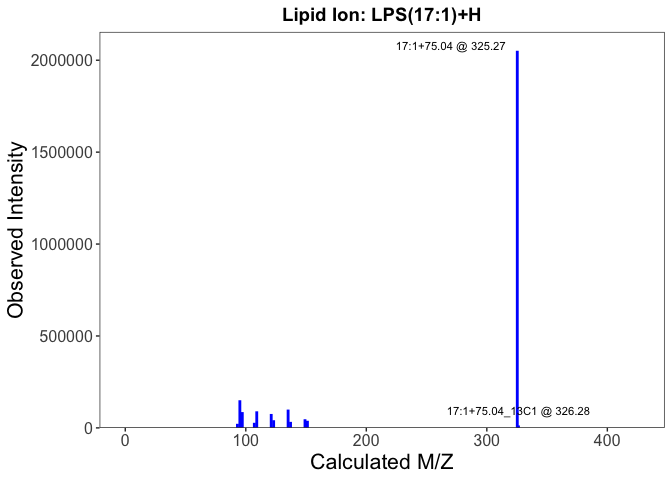

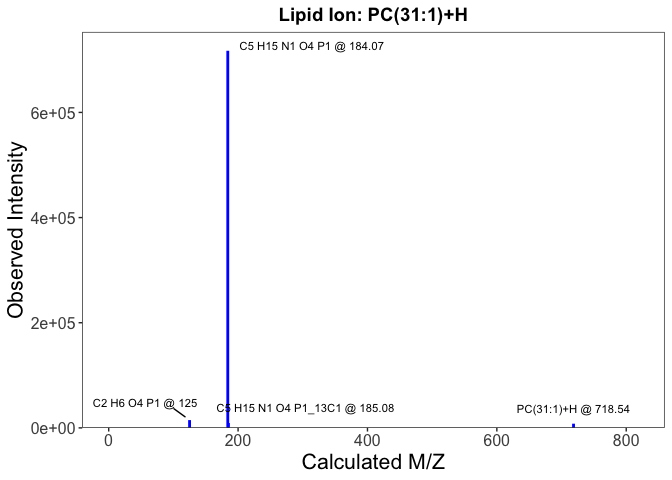

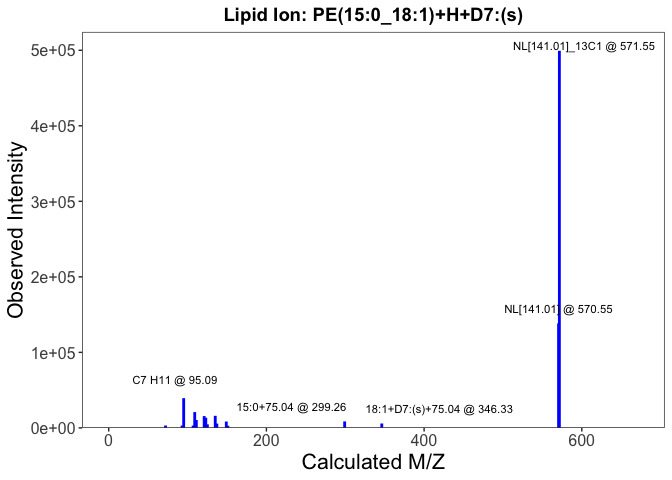

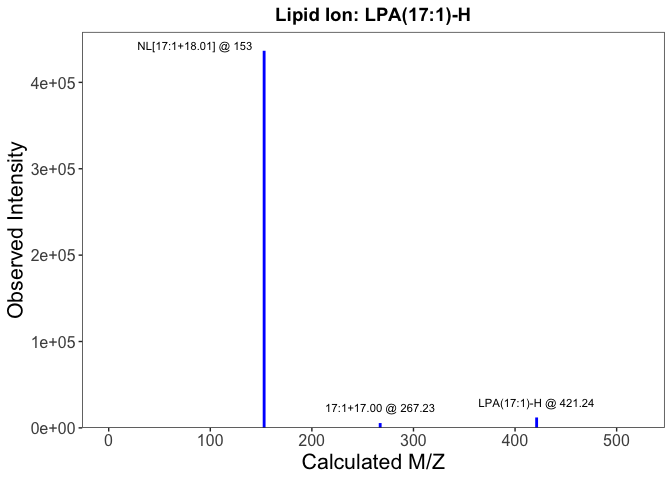

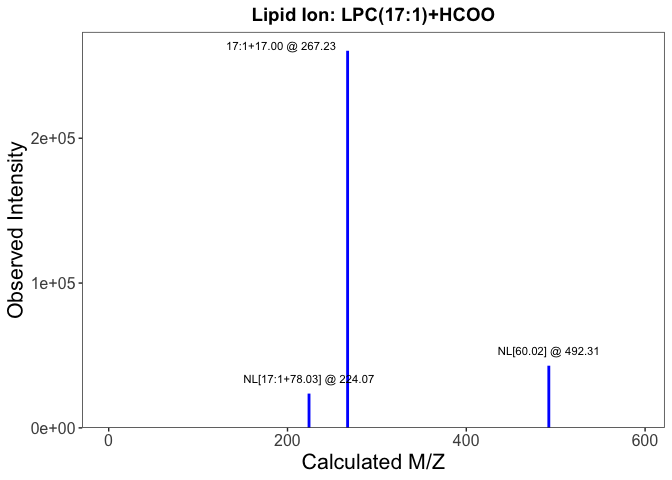

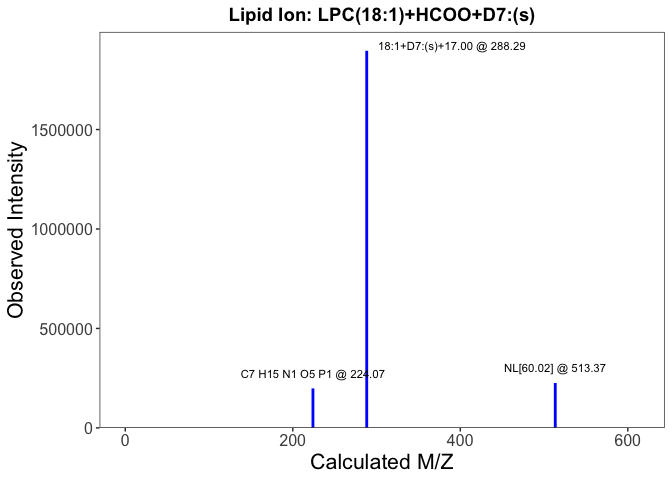

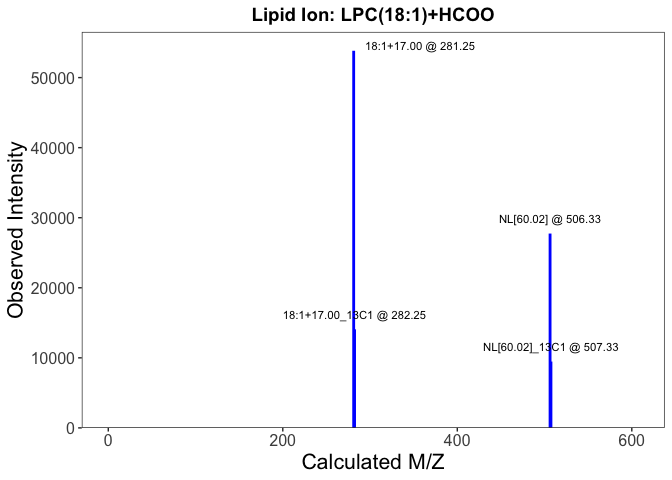

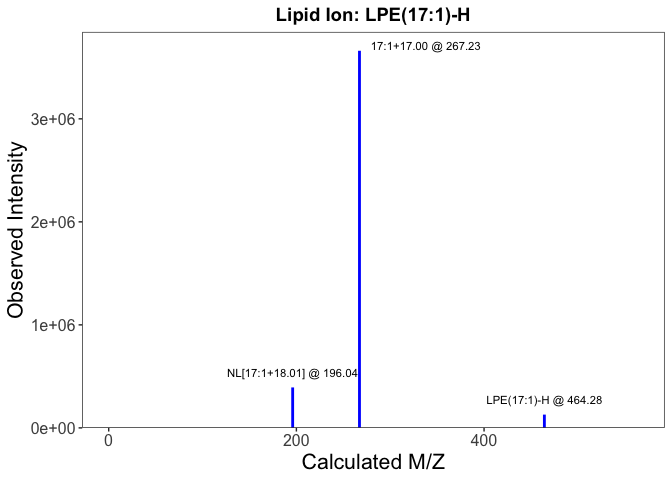

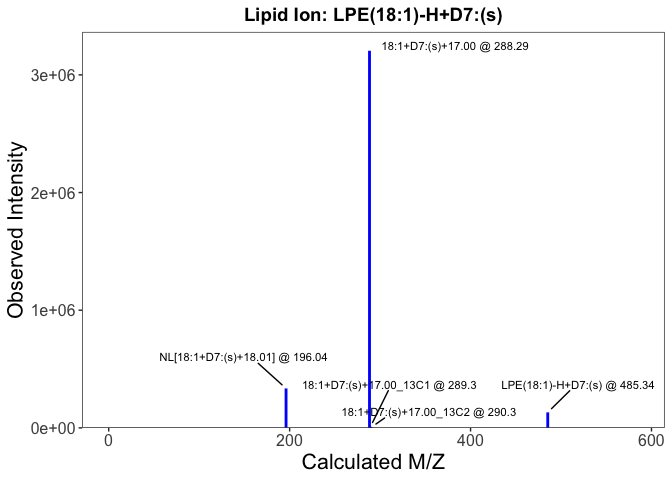

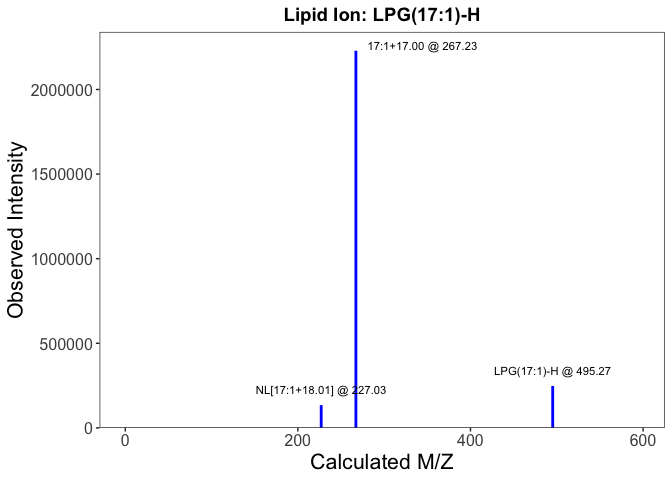

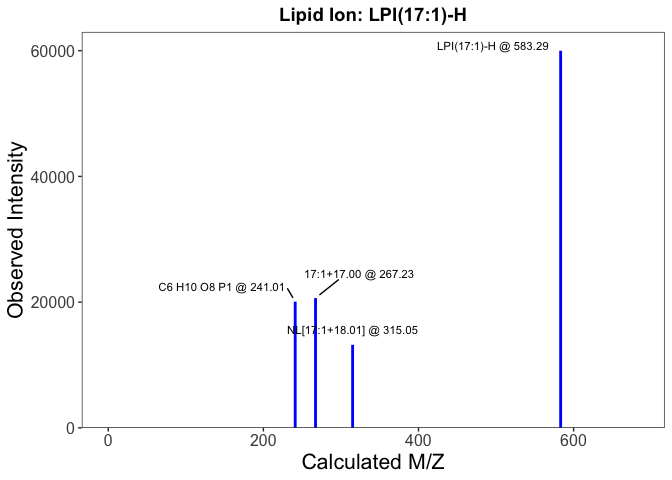

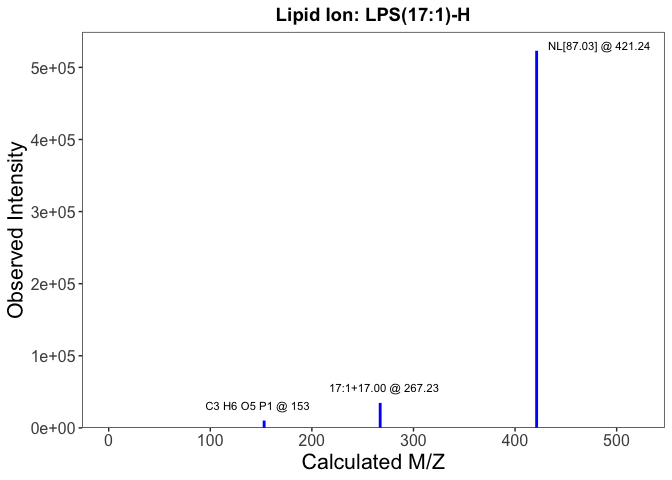

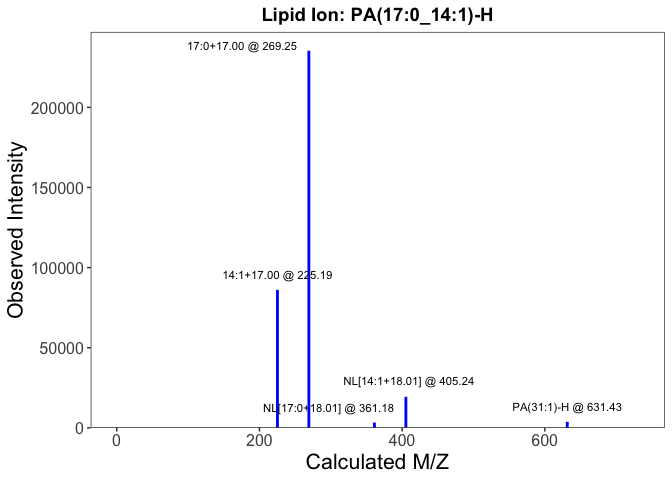

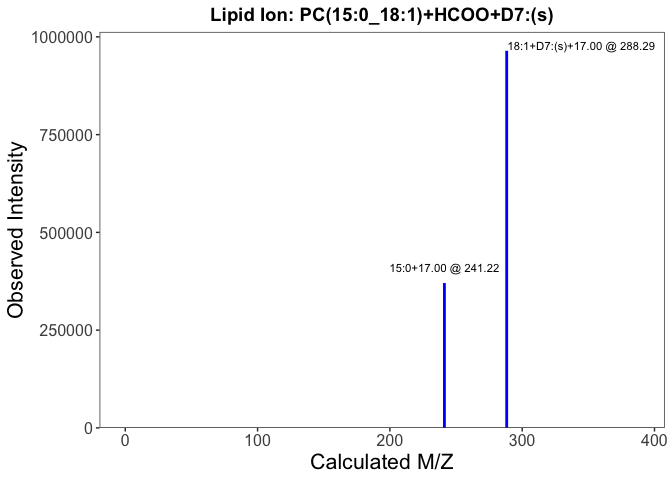

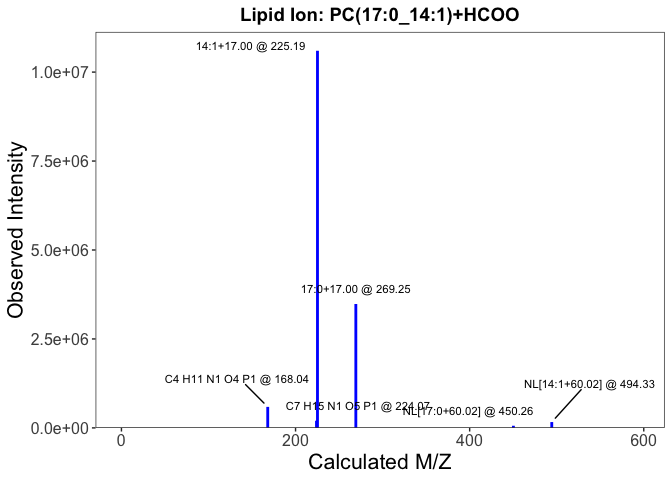

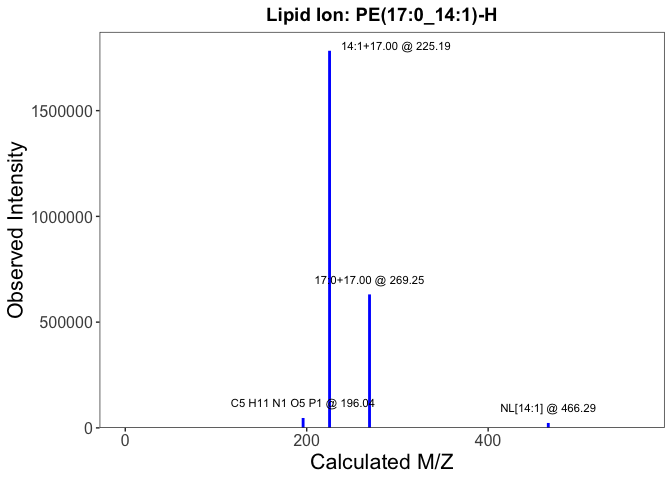

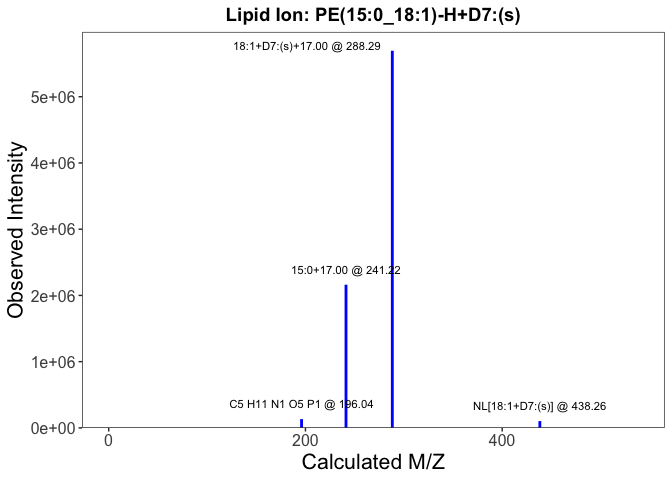

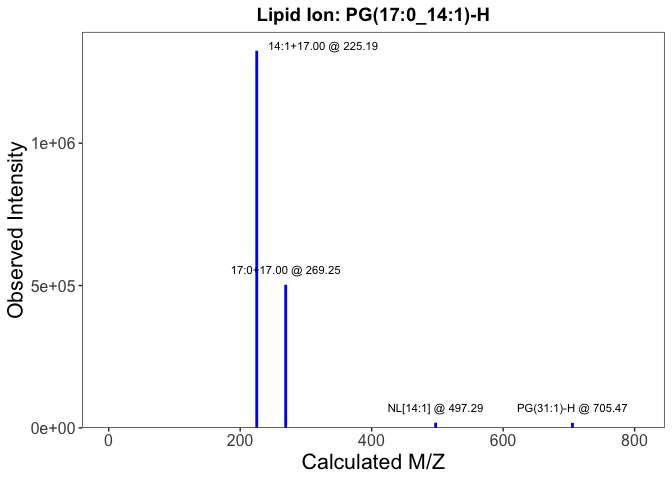

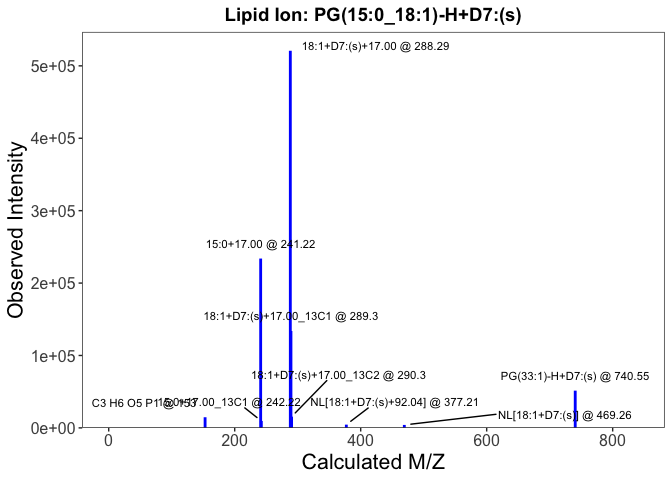

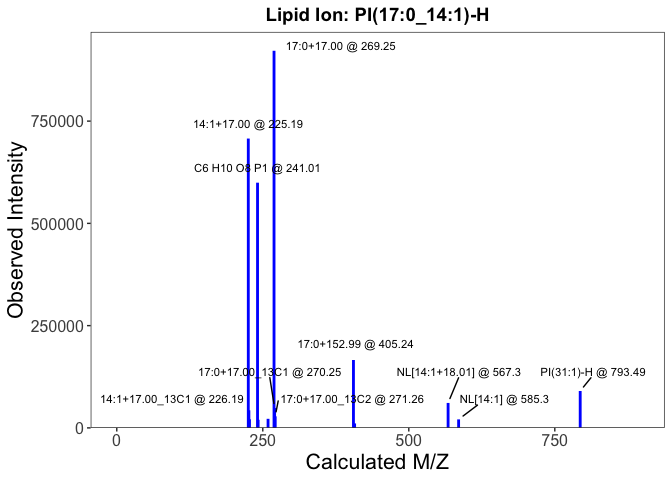

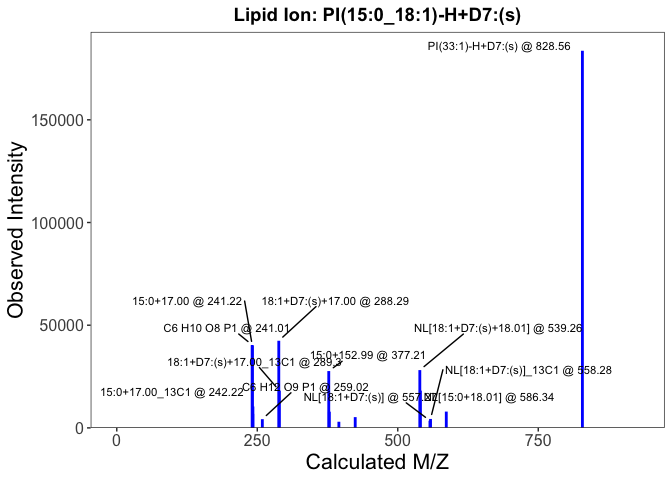

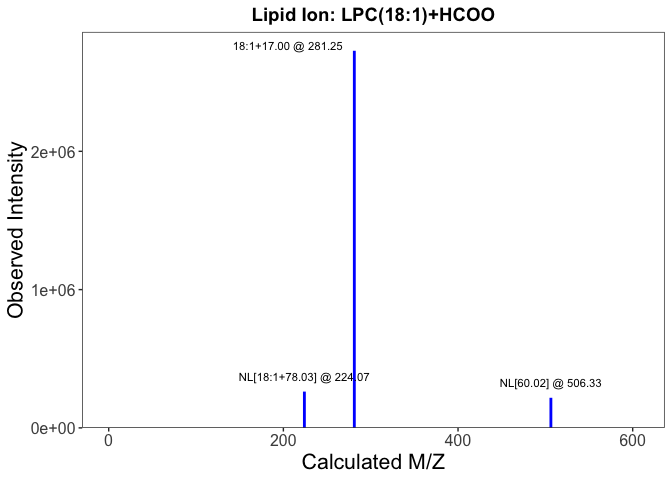

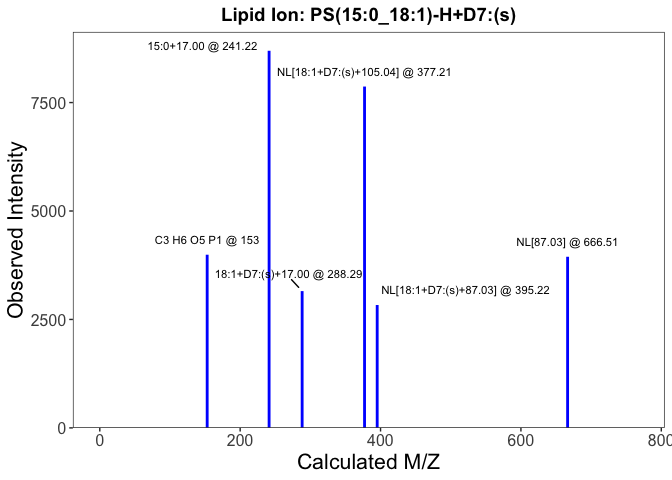

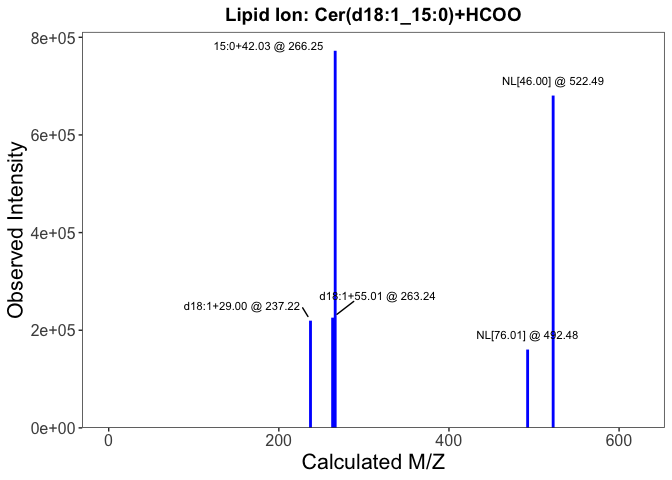

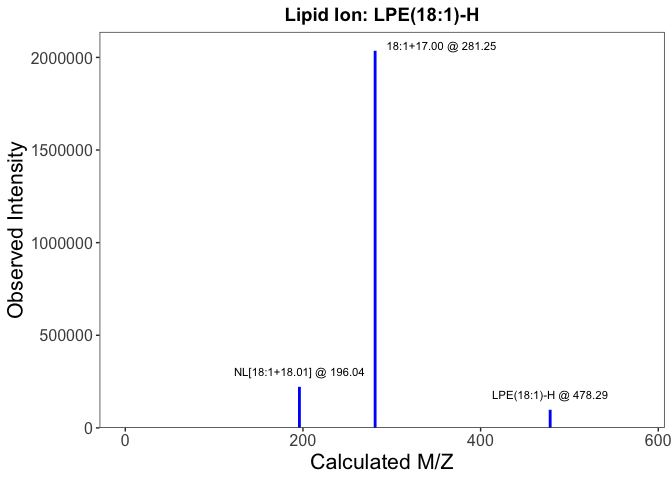

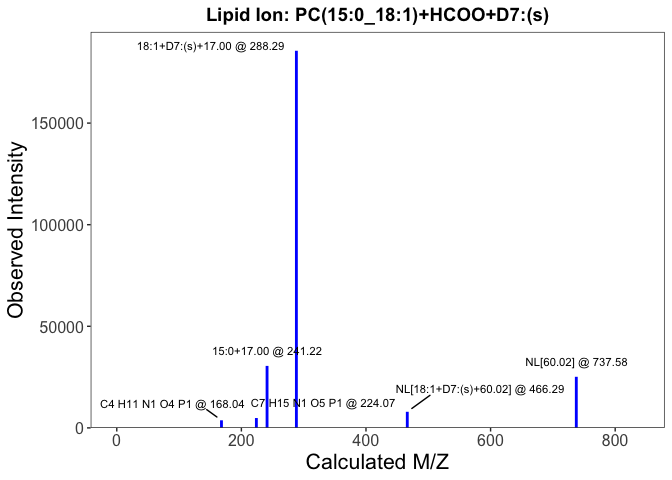

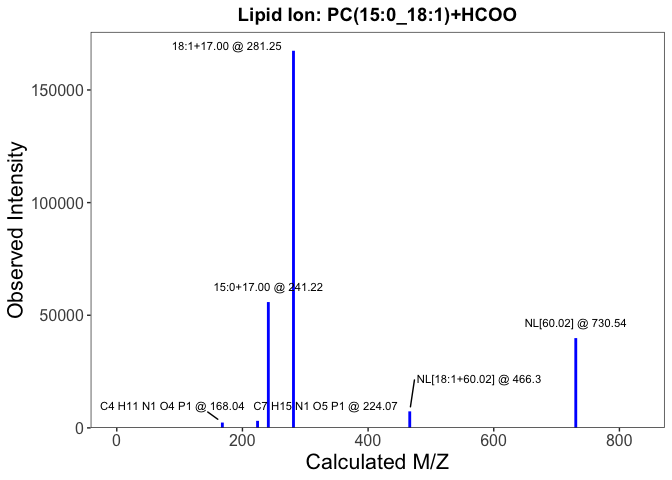

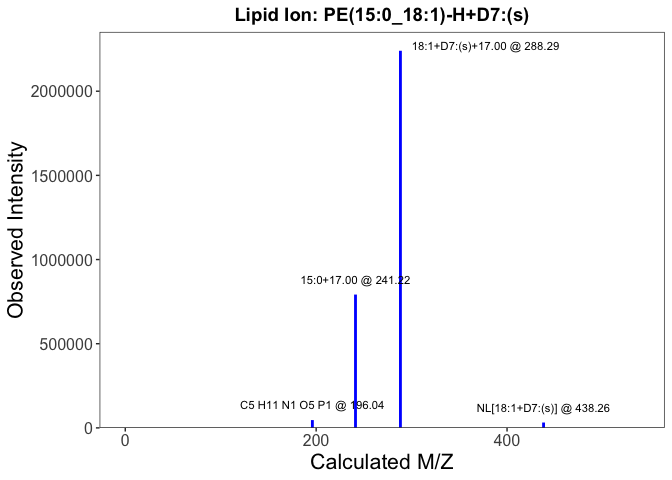

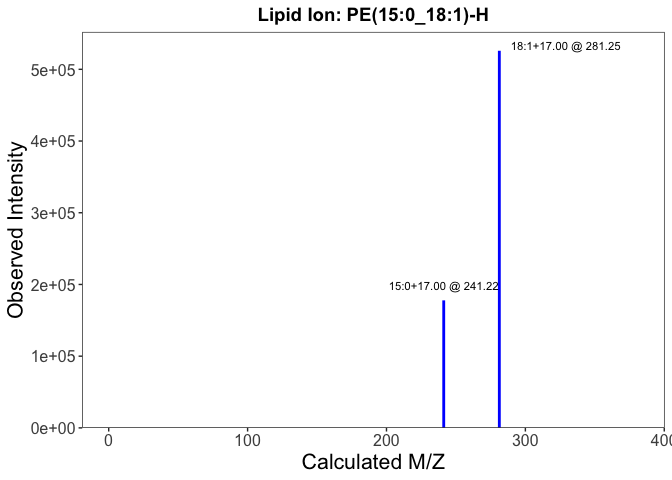

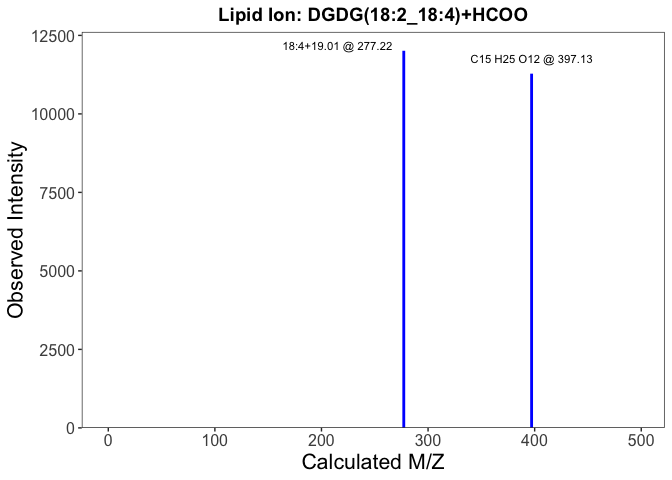

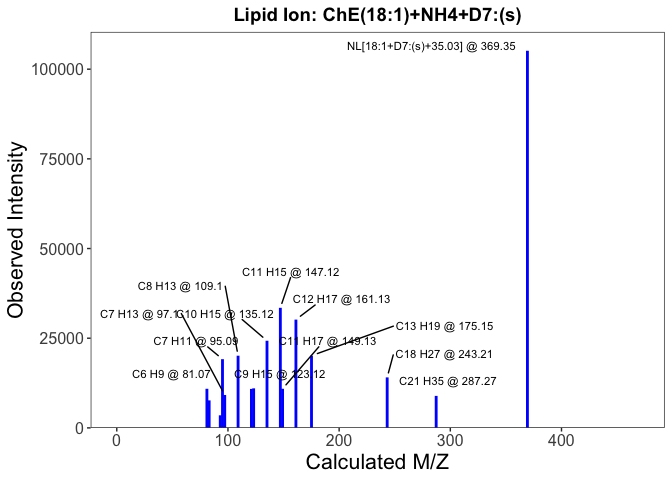

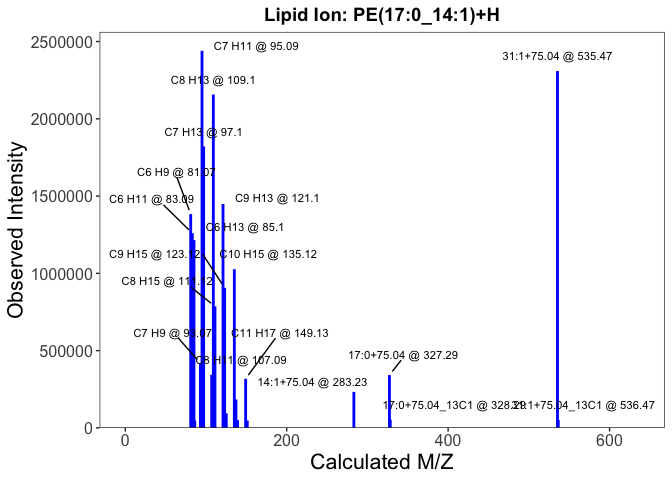

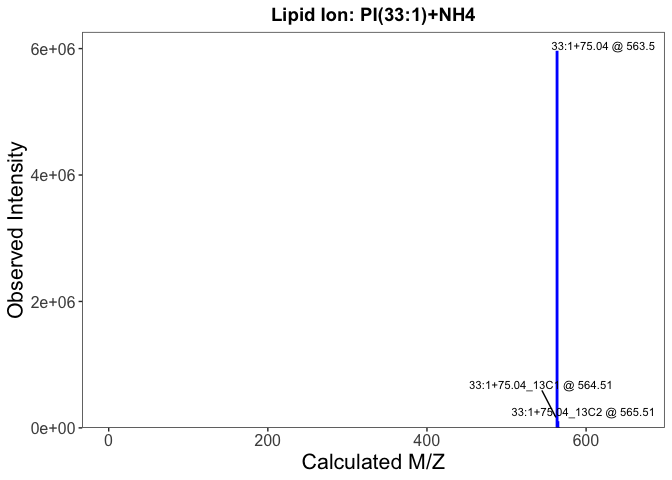

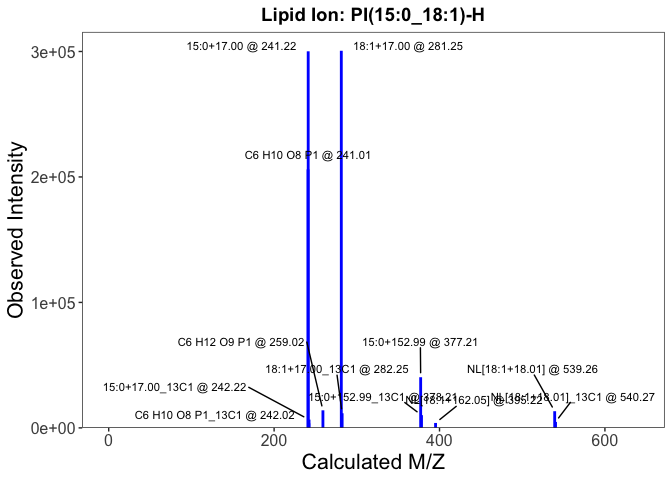

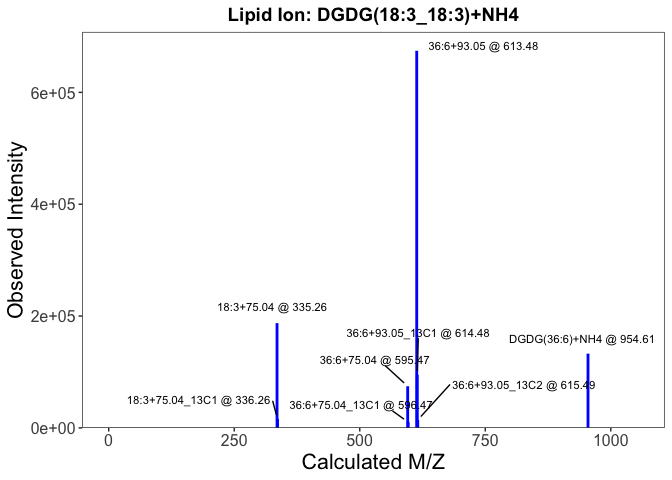

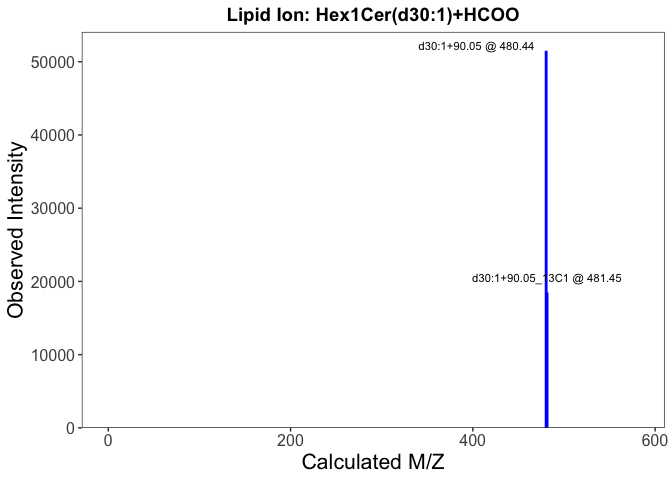

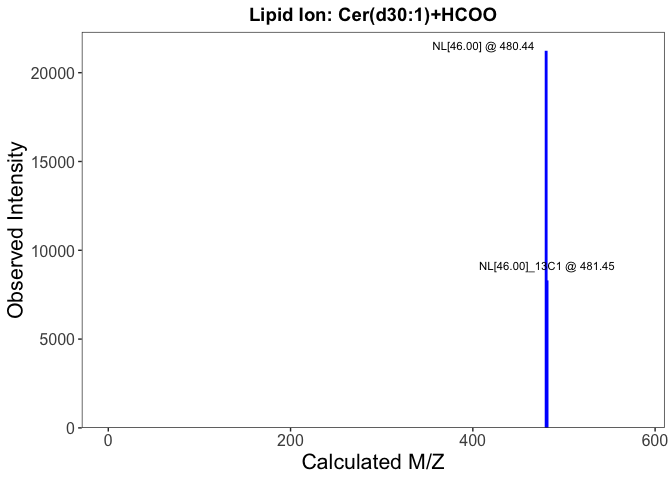

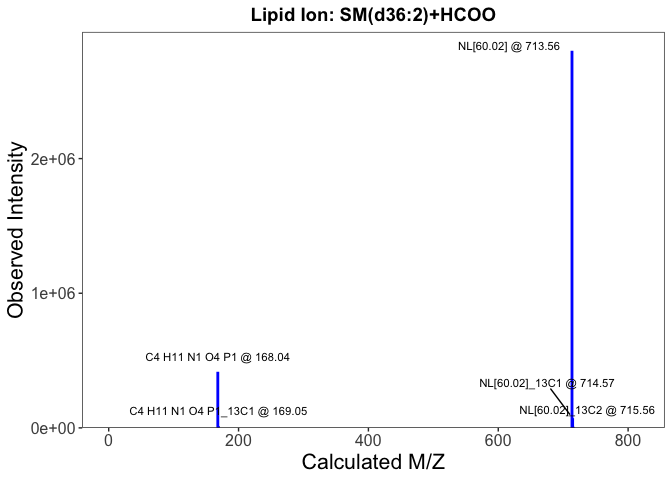

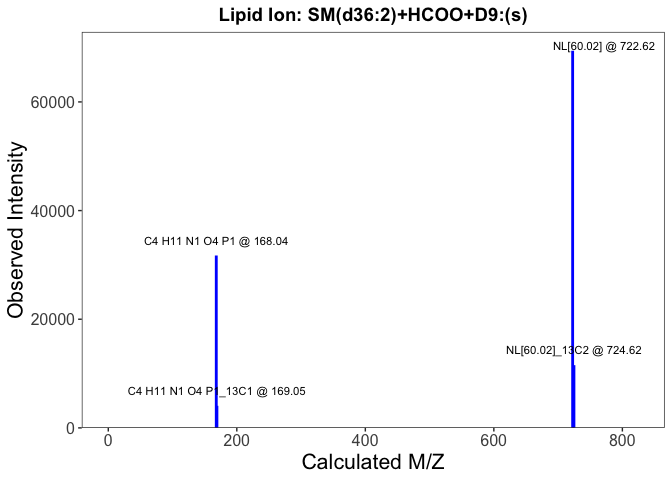

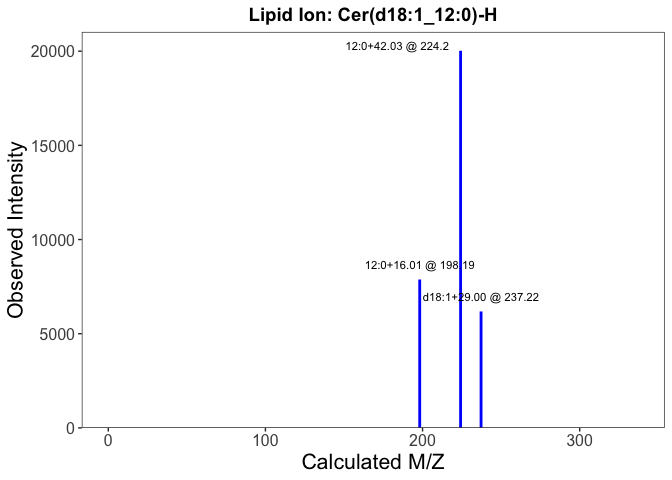

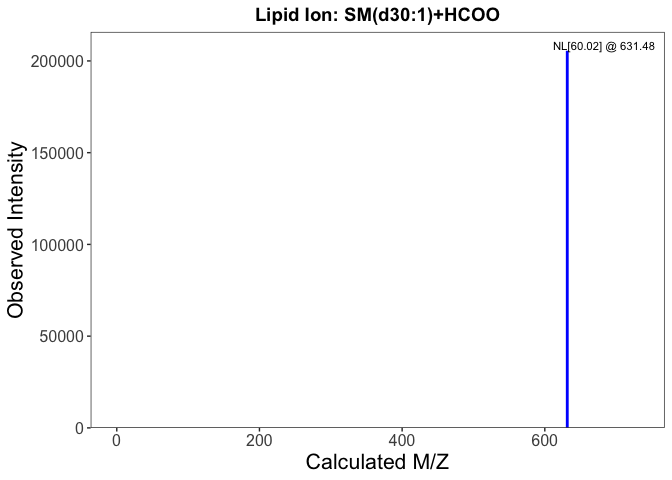

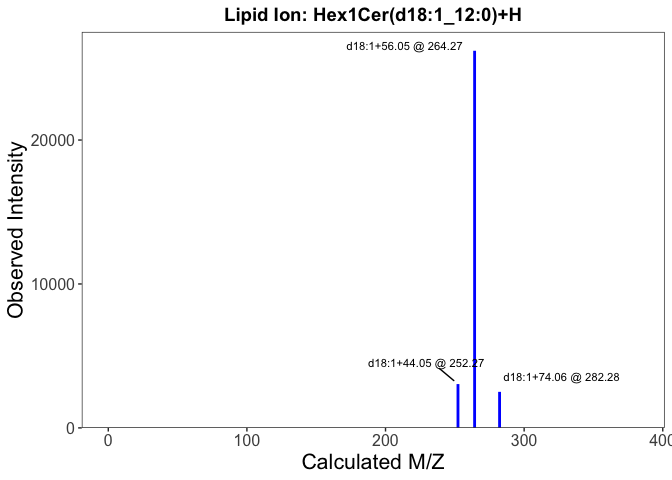

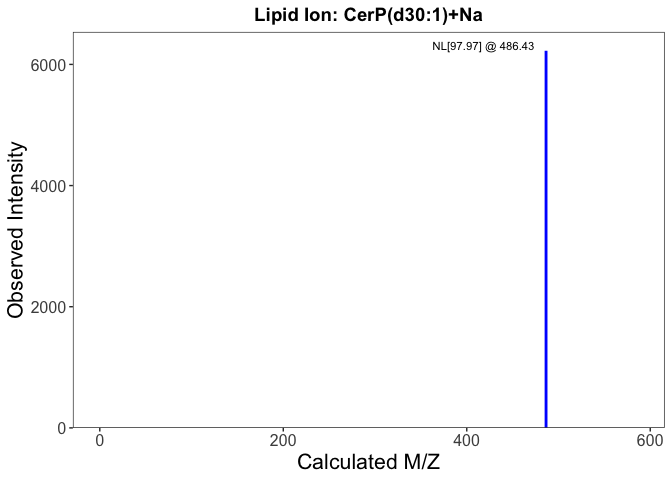

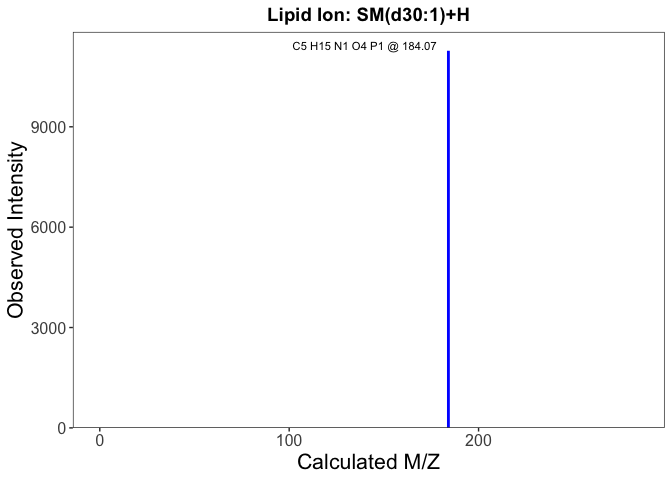

In [ ]:
library(htmlwidgets)
library(ggplot2)
library(plotly)
library(readr)
library(dplyr)
library(ggrepel)

# Read the file line by line
lines <- readLines("Lipid-standard-msms-label.csv")

# Split the file into separate sections based on the header row
section_idx <- which(grepl("^SpecId", lines))
section_data <- lapply(1:length(section_idx), function(i) {
  start_row <- section_idx[i]
  if (i == length(section_idx)) {
    end_row <- length(lines)
  } else {
    end_row <- section_idx[i+1] - 1
  }
  read.csv(text = paste(lines[start_row:end_row], collapse = "\n"), stringsAsFactors = FALSE)
})

# Combine the data frames into a single list
mass_spec_data <- section_data

# Create a list to store the plots
plots <- list()

# Open the PDF device
pdf("mass_spec_plots.pdf", onefile = TRUE, width = 8, height = 6)

for (i in 1:length(section_data)) {
  spec_data <- section_data[[i]]
  
  # Remove any duplicate CalcMz values
  spec_data <- spec_data[!duplicated(spec_data$CalcMz), ]
  
  # Determine the x-axis and y-axis ranges to start from 0
  max_calcmz <- max(spec_data$CalcMz, na.rm = TRUE)
  max_obsi <- max(spec_data$ObsIty, na.rm = TRUE)
  x_range <- c(0, max_calcmz + 100)
  y_range <- c(0, max_obsi)
  
  # Create the plot
  gg <- ggplot(spec_data, aes(x = CalcMz, y = ObsIty)) +
    geom_segment(aes(xend = CalcMz, yend = 0), color = "blue", linewidth = 1) +
    geom_text_repel(aes(label = paste(ProName, round(ObsMz, 2), sep = " @ ")), vjust = 1, nudge_y = max_obsi * 0.05, size = 3, box.padding = 0.5, point.padding = 0.5) +
    labs(x = "Calculated M/Z", y = "Observed Intensity", title = paste("Lipid Ion:", spec_data$LipidIon[1])) +
    theme_bw() +
    theme(
      text = element_text(size = 5),
      axis.title = element_text(size = 16),
      axis.text = element_text(size = 12),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      plot.title = element_text(size = 14, face = "bold", hjust = 0.5)
    ) +
    scale_x_continuous(limits = x_range) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, NA))
  
  # Add the plot to the list
  plots[[i]] <- gg
  # Save the current plot to the PDF
  print(gg)
}

# Close the PDF device
dev.off()